- This trading strategy focuses on when a security moves "too" far away from some kind of average, and it will move back toward the mean at some point

In [8]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime, timedelta
rcParams['figure.figsize'] = 8,6
import seaborn as sb
import yfinance as yf
sb.set()

In [27]:
today = datetime.today()
one_year_ago = today - timedelta(days=365)

oil = yf.download('CL=F', start=one_year_ago, end=today)[['Close']]
oil.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2023-06-30,70.639999
2023-07-03,69.790001
2023-07-05,71.790001
2023-07-06,71.800003
2023-07-07,73.860001


In [52]:
ma = 30
oil['returns'] = np.log(oil["Close"]).diff()
oil['ma'] = oil['Close'].rolling(ma).mean() # one trading month average price
oil['ratio'] = oil['Close'] / oil['ma']

In [53]:
oil['ratio'].describe()

count    223.000000
mean       1.000145
std        0.046946
min        0.884848
25%        0.958765
50%        1.002150
75%        1.037749
max        1.092482
Name: ratio, dtype: float64

In [54]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(oil['ratio'].dropna(), percentiles)

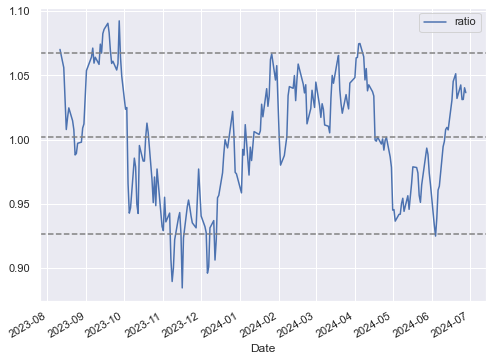

In [55]:
oil['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');

<AxesSubplot:xlabel='Date'>

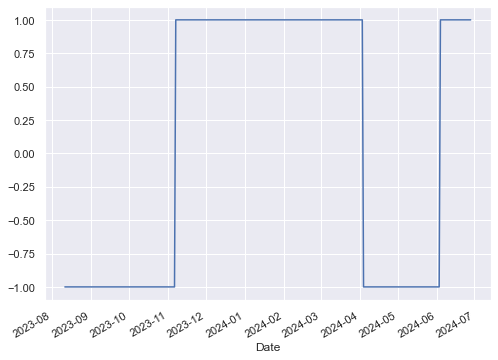

In [56]:
short = p[-1]
long = p[0]
oil['position'] = np.where(oil.ratio > short, -1, np.nan)
oil['position'] = np.where(oil.ratio < long, 1, oil['position'])
oil['position'] = oil['position'].ffill()
oil.position.dropna().plot()

In [57]:
oil['strat_return'] = oil['returns'] * oil['position'].shift()

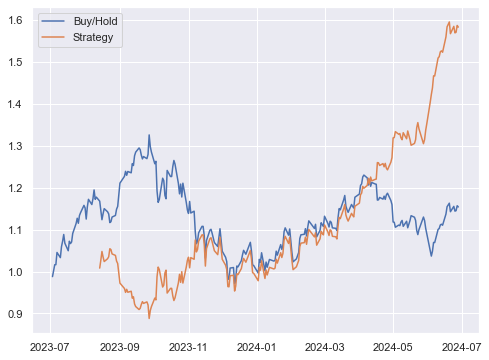

In [58]:
plt.plot(np.exp(oil['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(oil['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();

In [59]:
print(np.exp(oil['returns'].dropna()).cumprod()[-1] -1)
print(np.exp(oil['strat_return'].dropna()).cumprod()[-1] - 1)

0.15430353369278538
0.5834954105237702
